In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from utils.helpers import *


In [2]:
# Load CSV
train_df = pd.read_csv('data/train_selected.csv')
eval_df  = pd.read_csv('data/test_selected.csv')
eval_ttf_df = convert_txt_to_df('ttf','data/PM_truth.txt')
eval_df = pd.concat([eval_df,eval_ttf_df],axis=1)

print('Train DF: ',train_df.shape)
print('Eval DF: ',eval_df.shape)

Train DF:  (20631, 8)
Eval DF:  (100, 7)


## Insights from Dataframe 

In [3]:
print('Train DF: ',train_df.columns)
train_df.describe()

Train DF:  Index(['id', 'cycle', 's1', 's2', 's3', 's4', 'ttf', 'label_bnc'], dtype='object')


id         cycle            s1            s2            s3  \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.000000   
mean      51.506568    108.807862   1408.933782    553.367711     47.541168   
std       29.227633     68.880990      9.000605      0.885092      0.267087   
min        1.000000      1.000000   1382.250000    549.850000     46.850000   
25%       26.000000     52.000000   1402.360000    552.810000     47.350000   
50%       52.000000    104.000000   1408.040000    553.440000     47.510000   
75%       77.000000    156.000000   1414.555000    554.010000     47.700000   
max      100.000000    362.000000   1441.490000    556.060000     48.530000   

                 s4           ttf     label_bnc  
count  20631.000000  20631.000000  20631.000000  
mean     521.413470    107.807862      0.150259  
std        0.737553     68.880990      0.357334  
min      518.690000      0.000000      0.000000  
25%      520.960000     51.000000      0.000000  
50%      521.480000    103.000000      0.000000  
75%      521.950000    155.000000      0.000000  
max      523.380000    361.000000      1.000000

Count: The total number of entries (rows) for each column. In the dataset, there are 20,631 entries for each column.

Mean: The average value for each column. For example, the average cycle number (cycle) is approximately 108.81, and the average sensor readings (s1, s2, s3, s4) are around 1408.93, 553.37, 47.54, and 521.41, respectively. The mean of ttf (Time-To-Failure) is 107.81, indicating the average remaining life cycles of engines in the dataset.

Std (Standard Deviation): This measures the spread of the data around the mean. A higher standard deviation means the data points are more spread out. For instance, the standard deviation for cycle is 68.88, suggesting a wide variation in the number of cycles among different engines.

Min: The minimum value in each column. The minimum values for sensor readings and other columns give the lowest recorded values in the dataset. For example, the minimum ttf is 0, indicating at least one engine has reached its failure point in your dataset.

25% (First Quartile): This is the median of the first half of the data. For example, 25% of the engines have a cycle number less than or equal to 52.

50% (Median): This is the middle value of the dataset. For example, the median value of cycle is 104, meaning half of the engines have completed more cycles and half fewer.

75% (Third Quartile): This is the median of the second half of the data. For instance, 75% of the engines have a cycle number less than or equal to 156.

Max: The maximum value in each column. It shows the highest recorded value. For example, the maximum cycle number is 362, indicating the longest-running engine in your dataset before failure or the end of observation.

In [4]:
print('Eval DF: ',eval_df.columns)
eval_df.describe()

Eval DF:  Index(['id', 'cycle', 's1', 's2', 's3', 's4', 'ttf'], dtype='object')


id       cycle           s1          s2          s3  \
count  100.000000  100.000000   100.000000  100.000000  100.000000   
mean    50.500000  130.960000  1410.548200  553.148900   47.595100   
std     29.011492   53.593479     8.626344    0.880291    0.256989   
min      1.000000   31.000000  1389.330000  550.880000   47.080000   
25%     25.750000   88.750000  1403.912500  552.577500   47.397500   
50%     50.500000  133.500000  1410.300000  553.270000   47.585000   
75%     75.250000  164.250000  1416.922500  553.735000   47.757500   
max    100.000000  303.000000  1428.420000  555.070000   48.130000   

               s4        ttf  
count  100.000000  100.00000  
mean   521.277000   75.52000  
std      0.697532   41.76497  
min    519.440000    7.00000  
25%    520.812500   32.75000  
50%    521.450000   86.00000  
75%    521.772500  112.25000  
max    522.650000  145.00000

Count: This dataset has 100 entries for each column, indicating it's smaller than the training dataset ("Train DF").

Mean: The average values in each column. Notably, the average cycle number is 130.96, which is higher than in the training dataset, suggesting that this evaluation set might contain engines that have been operational for longer periods on average. The mean ttf (Time-To-Failure) is 75.52, suggesting a shorter average remaining life for engines in this dataset compared to the training set.

Std (Standard Deviation): Indicates the variability in the dataset. For example, the cycle standard deviation is 53.59, showing a somewhat wide variation in engine operational cycles.

Min: The minimum values for each column. The minimum ttf here is 7, suggesting the closest engine to failure in this set is closer to its end of life compared to the training set. (has only 7 operational cycles left before it is expected to fail)

25%, 50% (Median), and 75%: These percentiles give you an idea of the distribution of the data. For instance, the median cycle number is higher at 133.5 compared to the training set, reinforcing that this dataset contains engines with generally higher operational cycles.

Max: The maximum value in each column. The maximum cycle is 303, which is lower than the training set's maximum, indicating a narrower range of operational cycles in this evaluation dataset.

## Checking for Nan Values

In [5]:
train_df.isna().sum()

id           0
cycle        0
s1           0
s2           0
s3           0
s4           0
ttf          0
label_bnc    0
dtype: int64

In [6]:
eval_df.isna().sum()

id       0
cycle    0
s1       0
s2       0
s3       0
s4       0
ttf      0
dtype: int64

There are no nan values in both train and test df 

## Check Skew

Skewness values provide insights into the shape of the distribution of your data. Understanding these can help in making decisions about data preprocessing and choosing appropriate models for predictive maintenance. For example, highly skewed data might need transformation to improve model performance.

In [7]:
train_df.skew()

id          -0.067815
cycle        0.499904
s1           0.443194
s2          -0.394329
s3           0.469329
s4          -0.442407
ttf          0.499904
label_bnc    1.957690
dtype: float64

id (-0.067815): The skewness is close to 0, suggesting that the distribution of engine IDs is fairly symmetrical around its mean.

cycle (0.499904): A positive skewness indicates that the distribution of cycles is slightly skewed to the right. This means there are more engines with lower operational cycles than higher ones.

Sensor Readings (s1, s2, s3, s4):

s1 (0.443194) and s3 (0.469329): These positive skewness values suggest a slight right skew in their distributions. There are more engines with lower sensor readings.
s2 (-0.394329) and s4 (-0.442407): These negative skewness values indicate a slight left skew. More engines have higher readings for these sensors.
ttf (0.499904): The skewness is positive and identical to cycle, which is expected as TTF (Time-To-Failure) is likely directly related to the cycle count. This skewness implies that more engines are closer to the beginning of their operational life than the end.

label_bnc (1.957690): This is a significantly high positive skewness, indicating a highly asymmetric distribution skewed to the right. It suggests that the majority of your engines (based on this binary label) are not close to failure (assuming 0 indicates normal and 1 indicates close to failure).

In [11]:
eval_df.skew()

id       0.000000
cycle    0.215392
s1       0.093980
s2      -0.342543
s3       0.246686
s4      -0.531490
ttf     -0.232969
dtype: float64

id (0.000000): A skewness of 0 indicates that the distribution of engine IDs is perfectly symmetrical. This means that the distribution of engine IDs in your evaluation set is evenly balanced around its mean.

cycle (0.215392): A slightly positive skewness value suggests a mild rightward skew in the distribution of engine operational cycles. This means there are slightly more engines with fewer cycles than those with a higher number of cycles.

Sensor Readings (s1, s2, s3, s4):

s1 (0.093980) and s3 (0.246686): These positive skewness values, although relatively small, indicate a slight right skew in their distributions. There are a bit more engines with lower readings for these sensors.
s2 (-0.342543) and s4 (-0.531490): Negative skewness values suggest a left skew in the distribution. More engines have higher readings for these sensors.
ttf (-0.232969): The negative skewness for Time-To-Failure (ttf) suggests a leftward skew. This implies that more engines in this dataset are closer to the end of their operational life, with fewer cycles remaining before failure.

## Check Kurtosis 

Kurtosis values provide insights into the presence and extremity of outliers in your data. Understanding kurtosis is important in predictive modeling, as it can affect the performance and selection of models. For example, data with high kurtosis (heavy tails) might require robust modeling techniques that can handle outliers effectively. Conversely, data with low kurtosis (lighter tails) might not need such considerations.

In [8]:
train_df.kurtosis()

id          -1.219824
cycle       -0.218539
s1          -0.163681
s2          -0.157949
s3          -0.172192
s4          -0.144917
ttf         -0.218539
label_bnc    1.832726
dtype: float64

id (-1.219824): A negative kurtosis value indicates that the distribution of engine IDs has lighter tails than a normal distribution. This means there are fewer extreme values than what would be expected in a normal distribution.

cycle, ttf (-0.218539): Both cycle and Time-To-Failure (ttf) have a similar kurtosis value, which is slightly negative. This suggests that these distributions have slightly fewer and less extreme outliers compared to a normal distribution.

Sensor Readings (s1, s2, s3, s4):

All sensor readings (s1, s2, s3, s4) have negative kurtosis values (ranging from -0.144917 to -0.172192). This indicates that the distributions of these sensor readings are relatively flat with fewer extreme values than a normal distribution.
label_bnc (1.832726): This positive kurtosis value indicates that the distribution of the binary label for proximity to failure is more peaked than a normal distribution and has heavier tails. This suggests a higher likelihood of extreme values, which in this context could be interpreted as having more instances that are significantly different from the majority (more distinct cases of engines being close to failure or not).

In [10]:
eval_df.kurtosis()

id      -1.200000
cycle    0.000506
s1      -0.536076
s2      -0.056550
s3      -0.560676
s4      -0.180873
ttf     -1.288277
dtype: float64

id (-1.200000): This negative kurtosis value suggests that the distribution of engine IDs has lighter tails than a normal distribution (which has a kurtosis of 0). This means there are fewer extreme values in the engine ID distribution.

cycle (0.000506): A kurtosis value very close to 0 indicates that the distribution of engine operational cycles is similar to a normal distribution in terms of the extremity of outliers.

Sensor Readings (s1, s2, s3, s4):

s1 (-0.536076), s3 (-0.560676), and s4 (-0.180873): These negative kurtosis values indicate that the distributions of these sensors' readings are platykurtic, having fewer and less extreme outliers compared to a normal distribution.
s2 (-0.056550): The kurtosis is close to 0, suggesting a distribution similar to a normal distribution in terms of the tails and outliers.
ttf (-1.288277): The negative kurtosis for Time-To-Failure (ttf) indicates that the distribution is platykurtic. This suggests fewer and less extreme values in the tails than what a normal distribution would exhibit. In practical terms, this might mean that instances of engines being very close to or very far from failure are less common than the mid-range scenarios.

## Plots to Gain Insights on Data 

In [14]:
def create_distribution_plot(data:pd.DataFrame):
    fig,axes = plt.subplots(3,2,figsize=(15,12))
    # Plotting distribution of sensor readings
    sns.histplot(data['s1'], kde=True, ax=axes[0, 0]).set_title('Distribution of Sensor 1 Readings')
    sns.histplot(data['s2'], kde=True, ax=axes[0, 1]).set_title('Distribution of Sensor 2 Readings')
    sns.histplot(data['s3'], kde=True, ax=axes[1, 0]).set_title('Distribution of Sensor 3 Readings')
    sns.histplot(data['s4'], kde=True, ax=axes[1, 1]).set_title('Distribution of Sensor 4 Readings')
    sns.histplot(data['cycle'], kde=True, ax=axes[2, 0]).set_title('Distribution of Cycle Readings')

    plt.tight_layout()
    plt.show()
    
def create_corelation_matrix_plot(data:pd.DataFrame,columns:list):
    # Setting the aesthetic style of the plots
    sns.set_style("whitegrid")

    # Correlation matrix for the train data
    # correlation_matrix = data[['s1', 's2', 's3', 's4', 'ttf']].corr()
    correlation_matrix = data[columns].corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix for Sensor Readings and TTF')
    plt.show()
    
def create_corelation_scatter_plot(data:pd.DataFrame):
    # Creating scatter plots for each sensor against TTF
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # Plotting each sensor's reading against TTF
    sns.scatterplot(x='ttf', y='s1', data=data, ax=axes[0, 0], alpha=0.6).set_title('Sensor 1 vs TTF')
    sns.scatterplot(x='ttf', y='s2', data=data, ax=axes[0, 1], alpha=0.6).set_title('Sensor 2 vs TTF')
    sns.scatterplot(x='ttf', y='s3', data=data, ax=axes[1, 0], alpha=0.6).set_title('Sensor 3 vs TTF')
    sns.scatterplot(x='ttf', y='s4', data=data, ax=axes[1, 1], alpha=0.6).set_title('Sensor 4 vs TTF')
    sns.scatterplot(x='ttf', y='cycle', data=data, ax=axes[2, 0], alpha=0.6).set_title('Cycle vs TTF')

    plt.tight_layout()
    plt.show()
    
def create_box_plots_for_outliers(data:pd.DataFrame):
    # Creating box plots for each sensor to visualize the outliers
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # Plotting box plots
    sns.boxplot(x=data['s1'], ax=axes[0, 0]).set_title('Box Plot for Sensor 1')
    sns.boxplot(x=data['s2'], ax=axes[0, 1]).set_title('Box Plot for Sensor 2')
    sns.boxplot(x=data['s3'], ax=axes[1, 0]).set_title('Box Plot for Sensor 3')
    sns.boxplot(x=data['s4'], ax=axes[1, 1]).set_title('Box Plot for Sensor 4')
    sns.boxplot(x=data['cycle'], ax=axes[2, 0]).set_title('Box Plot for Cycle')

    plt.tight_layout()
    plt.show()

def create_scatter_plot_for_outliers(data:pd.DataFrame):
    # Identifying outliers using Z-score (threshold set at 3)
    z_scores = np.abs((data[['s1', 's2', 's3', 's4']] - data[['s1', 's2', 's3', 's4']].mean()) / data[['s1', 's2', 's3', 's4']].std())
    outliers = z_scores > 3
    outliers_summary = outliers.sum().to_frame(name='Number of Outliers')

    print(outliers_summary)
    outlier_mask = outliers.any(axis=1)
    outliers_data = data[outlier_mask]
    non_outliers_data = data[~outlier_mask]

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Scatter plots with outliers marked
    sns.scatterplot(x='cycle', y='s1', data=non_outliers_data, ax=axes[0, 0], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s1', data=outliers_data, ax=axes[0, 0], color='red', label='Outlier')

    sns.scatterplot(x='cycle', y='s2', data=non_outliers_data, ax=axes[0, 1], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s2', data=outliers_data, ax=axes[0, 1], color='red', label='Outlier')

    sns.scatterplot(x='cycle', y='s3', data=non_outliers_data, ax=axes[1, 0], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s3', data=outliers_data, ax=axes[1, 0], color='red', label='Outlier')

    sns.scatterplot(x='cycle', y='s4', data=non_outliers_data, ax=axes[1, 1], alpha=0.6, label='Normal')
    sns.scatterplot(x='cycle', y='s4', data=outliers_data, ax=axes[1, 1], color='red', label='Outlier')

    plt.tight_layout()
    plt.show()


# Distribution Plots 

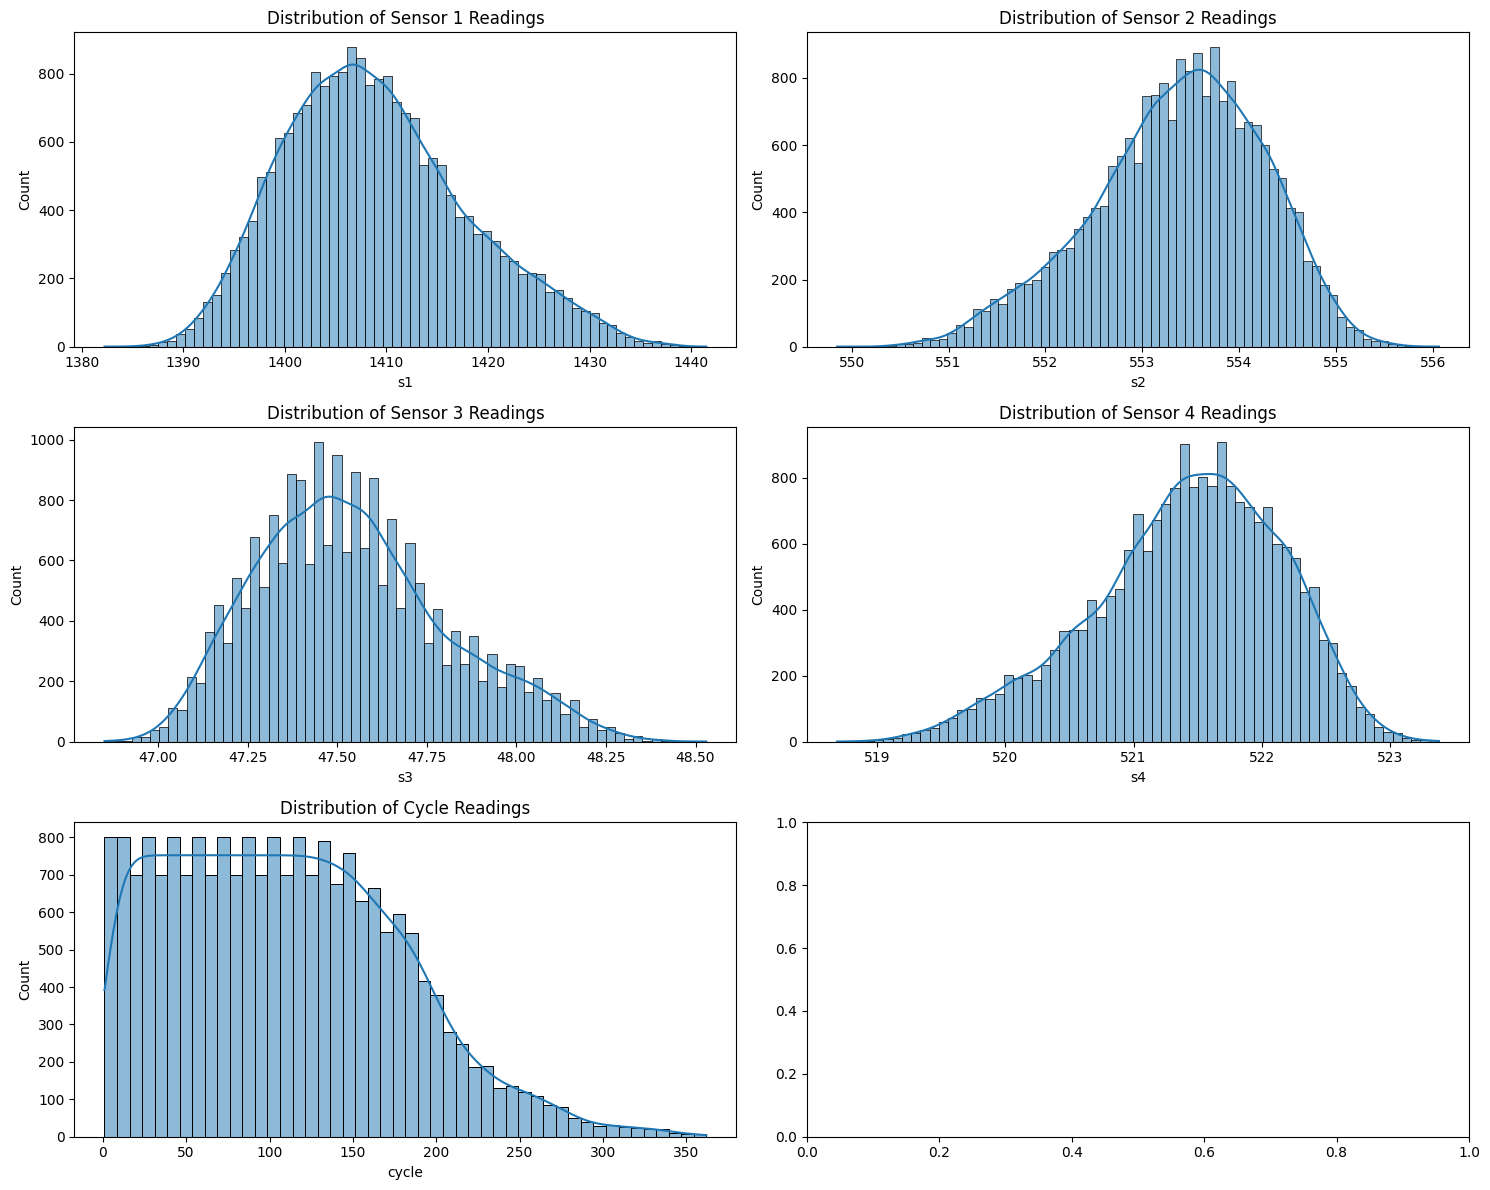

In [15]:
create_distribution_plot(train_df)

The distributions for the sensor readings (Sensor 1, Sensor 2, Sensor 3, and Sensor 4) appear to closely resemble a Gaussian distribution, also known as a normal distribution, which is characterized by a symmetric bell-shaped curve. However, there are slight deviations:

Sensor 1 and Sensor 2: These histograms show a distribution that is quite symmetric and bell-shaped, which is indicative of a normal distribution, although Sensor 2 has a minor skew to the left.
Sensor 3 and Sensor 4: These have a slight skew to the right, meaning that while they are mostly bell-shaped, they have a tail that extends more to the higher values.
The Cycle Readings histogram does not follow a Gaussian distribution—it shows a pronounced rightward skew, with a peak at the lower end of the cycle count and a long tail extending towards the higher cycle counts. This suggests that most engines are in the early stages of their life cycle, with relatively few having a large number of cycles.

In summary, while the sensor readings are approximately Gaussian with some skewness, the cycle readings do not follow a Gaussian distribution. The degree to which these distributions can be considered Gaussian would typically be assessed with statistical tests for normality, such as the Shapiro-Wilk test or the D'Agostino-Pearson omnibus test, which quantitatively measure how well the data conforms to a normal distribution.

In terms of statistics, the mean of the distributions would likely be close to the peak of each histogram for the sensors, while the mean for the cycle readings would be shifted to the left due to the skew. The standard deviation would provide insights into how spread out each distribution is; narrower distributions imply a smaller standard deviation. The skewness and kurtosis values that you have provided earlier are consistent with these visual interpretations: near-zero values for skewness and kurtosis indicate distributions close to normal, while positive or negative values indicate the direction and extent of the skew or the heaviness of the tails.

### Quantitavely Assess if the distribution is a Normal Distrubution

In [17]:
from scipy import stats
from tabulate import tabulate

def metrics_for_checking_normal_distribution(data:pd.DataFrame, columns:list=['s1', 's2', 's3', 's4', 'cycle']):
    results = {
        'Column': [],
        'Shapiro Statistic': [],
        'Shapiro p-value': [],
        'D\'Agostino Statistic': [],
        'D\'Agostino p-value': []
    }
    
    for col in columns:
        shapiro_stat, shapiro_p = stats.shapiro(data[col])
        dagostino_stat, dagostino_p = stats.normaltest(data[col])
        
        results['Column'].append(col)
        results['Shapiro Statistic'].append(shapiro_stat)
        results['Shapiro p-value'].append(shapiro_p)
        results['D\'Agostino Statistic'].append(dagostino_stat)
        results['D\'Agostino p-value'].append(dagostino_p)
    
    results_df = pd.DataFrame(results)
    
    # Pretty print the DataFrame using tabulate
    print(tabulate(results_df, headers='keys', tablefmt='pretty'))



In [18]:
metrics_for_checking_normal_distribution(train_df)

+---+--------+--------------------+------------------------+----------------------+-------------------------+
|   | Column | Shapiro Statistic  |    Shapiro p-value     | D'Agostino Statistic |   D'Agostino p-value    |
+---+--------+--------------------+------------------------+----------------------+-------------------------+
| 0 |   s1   | 0.9843162298202515 | 4.402879774908575e-42  |  645.5084110630376   | 6.755064910657037e-141  |
| 1 |   s2   | 0.9879209995269775 | 5.531733307644276e-38  |  523.1301156347602   | 2.5336039719248625e-114 |
| 2 |   s3   | 0.9815530776977539 |  9.80908925027372e-45  |  717.0642927745363   | 1.9564431784590942e-156 |
| 3 |   s4   | 0.9846979975700378 | 1.0959555289484394e-41 |  637.1438357106833   | 4.425618624479147e-139  |
| 4 | cycle  | 0.9687913656234741 |          0.0           |  821.6295132155666   | 3.8496222944558414e-179 |
+---+--------+--------------------+------------------------+----------------------+-------------------------+


/home/julian/miniconda3/envs/ml_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


- **Column**: The name of the data column that the tests were performed on.
- **Shapiro Statistic**: The test statistic from the Shapiro-Wilk test; values close to 1 suggest that the data is normally distributed. All your variables have values close to 1, indicating they may be normally distributed, but the significance of this is determined by the p-value.
- **Shapiro p-value**: The p-value from the Shapiro-Wilk test. A p-value lower than a chosen alpha level (commonly 0.05) suggests that the data is not normally distributed. In your case, all the p-values are extremely small (practically 0 for 'cycle'), indicating that the null hypothesis of normality is rejected for all variables.
- **D'Agostino Statistic**: The test statistic from the D'Agostino-Pearson omnibus test; a larger value indicates a deviation from normality. All your variables have large values, suggesting non-normality.
- **D'Agostino p-value**: The p-value from the D'Agostino-Pearson omnibus test. Like the Shapiro-Wilk test, a p-value below the alpha level indicates non-normality. Again, all your variables have extremely small p-values, leading to rejection of the null hypothesis of normality.

Both tests suggest that none of the variables come from a normally distributed population, which means that the data distribution deviates significantly from the normal distribution. In summary, based on these tests, your data does not appear to follow a normal distribution, which may have implications for certain statistical analyses and model assumptions that presume normality.


An approach to make data more normally distributed would be transform the data. We will add the method here so it can be used later. 

Apply transformations to your data to make it more normally distributed. Common transformations include 
-log, 
-square root, or 
-Box-Cox transformations.

After transformation, perform the normality tests again to see if the data now fits the assumption of normality.

In [22]:
from scipy.stats import boxcox
from numpy import log, sqrt

def transform_to_normal_distribution(data:pd.DataFrame):
    data = data.copy()
    # Apply log transformation (all values must be positive)
    data['s1_log'] = data['s1'].apply(lambda x: log(x) if x > 0 else None)
    data['s2_log'] = data['s2'].apply(lambda x: log(x) if x > 0 else None)
    data['s3_log'] = data['s3'].apply(lambda x: log(x) if x > 0 else None)
    data['s4_log'] = data['s4'].apply(lambda x: log(x) if x > 0 else None)
    data['cycle_log'] = data['cycle'].apply(lambda x: log(x) if x > 0 else None)

    # Apply square root transformation (all values must be positive)
    data['s1_sqrt'] = data['s1'].apply(sqrt)
    data['s2_sqrt'] = data['s2'].apply(sqrt)
    data['s3_sqrt'] = data['s3'].apply(sqrt)
    data['s4_sqrt'] = data['s4'].apply(sqrt)
    data['cycle_sqrt'] = data['cycle'].apply(sqrt)

    # # Apply Box-Cox transformation (all values must be positive)
    # # Note: Box-Cox returns a tuple (transformed array, lambda parameter), so we only take the first element
    # data['s1_boxcox'], _ = boxcox(data['s1']) if all(data['s1'] > 0) else (None, None)
    # data['s2_boxcox'], _ = boxcox(data['s2']) if all(data['s2'] > 0) else (None, None)
    # data['s3_boxcox'], _ = boxcox(data['s3']) if all(data['s3'] > 0) else (None, None)
    # data['s4_boxcox'], _ = boxcox(data['s4']) if all(data['s4'] > 0) else (None, None)
    # data['cycle_boxcox'], _ = boxcox(data['cycle']) if all(data['cycle'] > 0) else (None, None)

    # # Now 'data' DataFrame contains the original and transformed columns
    # print(data.head())
    return data

In [23]:
transformed_train_df = transform_to_normal_distribution(train_df)
metrics_for_checking_normal_distribution(transformed_train_df,columns=['s1_log','s2_log','s3_log','s4_log','cycle_log'])
metrics_for_checking_normal_distribution(transformed_train_df,columns=['s1_sqrt','s2_sqrt','s3_sqrt','s4_sqrt','cycle_sqrt'])

+---+-----------+--------------------+------------------------+----------------------+------------------------+
|   |  Column   | Shapiro Statistic  |    Shapiro p-value     | D'Agostino Statistic |   D'Agostino p-value   |
+---+-----------+--------------------+------------------------+----------------------+------------------------+
| 0 |  s1_log   | 0.9851706027984619 | 3.4778826586077635e-41 |  612.8137164329542   | 8.495564847939879e-134 |
| 1 |  s2_log   | 0.9877650737762451 | 3.520488577896174e-38  |  531.1868489853442   | 4.510672676623641e-116 |
| 2 |  s3_log   | 0.9823929071426392 |  5.74532370373175e-44  |  688.0586318781586   |  3.890151138761e-150   |
| 3 |  s4_log   | 0.9845083355903625 | 6.951841681515417e-42  |  644.8592618261624   | 9.345240713214748e-141 |
| 4 | cycle_log | 0.8745604753494263 |          0.0           |  5796.3179546808215  |          0.0           |
+---+-----------+--------------------+------------------------+----------------------+------------------

/home/julian/miniconda3/envs/ml_env/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Shapiro-Wilk Test:
- **Shapiro Statistic**: Values closer to 1 suggest that the data distribution is more like a normal distribution.
- **Shapiro p-value**: A low p-value (typically less than 0.05) indicates that the data distribution is significantly different from a normal distribution.

### D'Agostino-Pearson Test:
- **D'Agostino Statistic**: A higher value suggests a deviation from normality.
- **D'Agostino p-value**: Similar to the Shapiro-Wilk test, a low p-value here also indicates non-normality.

### Analysis of Your Results:
- **For Log Transformed Data**: The Shapiro statistics are close to 1, but the extremely low p-values for all variables suggest that the data does not follow a normal distribution, even after log transformation.
- **For Square Root Transformed Data**: Similar to the log-transformed data, the p-values are extremely low despite the Shapiro statistics being close to 1, indicating a significant deviation from normality.

### Conclusions for Modeling:
- **Non-Normality of Data**: Both transformations did not result in data distributions that conform to normality. Hence, models that heavily rely on the assumption of normality might not be suitable.
- **Model Selection**: Given the non-normality, you might consider models that are robust to non-normal distributions. These include non-parametric models, machine learning algorithms (like decision trees, random forests, gradient boosting machines), and neural networks.
- **Further Transformations**: If a specific model requires normally distributed input, consider exploring other data transformations or using robust versions of statistical models.
- **Model Evaluation**: Regardless of the chosen model, thorough evaluation using appropriate metrics is essential. This includes cross-validation and metrics that align with your modeling objectives (e.g., RMSE for regression, accuracy, precision, recall, F1-score for classification).

Remember, the goal of transformations is not to force the data to meet model assumptions but to find the most appropriate model and transformation (if necessary) for the given data. In predictive modeling, the focus is often more on the predictive performance of the model rather than strict adherence to assumptions.


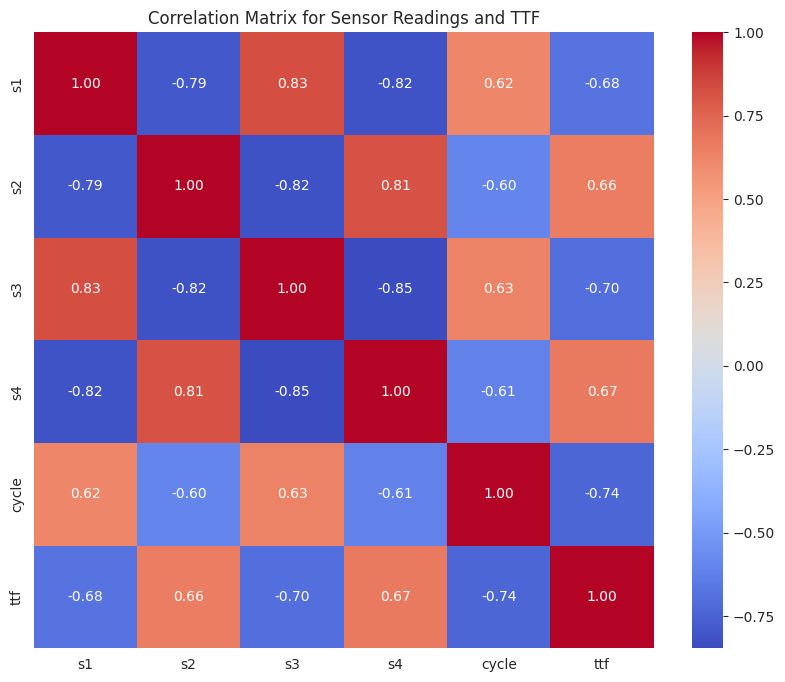

In [30]:
create_corelation_matrix_plot(train_df,columns=['s1', 's2', 's3', 's4', 'cycle','ttf'])

Each cell in the matrix shows the correlation coefficient between two variables. The variables are listed both along the x-axis (horizontal) and y-axis (vertical).
The correlation coefficient is a value between -1 and 1. A value of:
1 indicates a perfect positive correlation: as one variable increases, the other variable also increases.
-1 indicates a perfect negative correlation: as one variable increases, the other decreases.
0 indicates no correlation: the variables do not have a linear relationship.
The color scale on the right side indicates the strength and direction of the correlation. In this plot:
Red shades represent positive correlations.
Blue shades represent negative correlations.
The intensity of the color indicates the strength of the correlation (darker colors represent stronger correlations, whether positive or negative).
Looking at the specific variables:

s1, s2, s3, s4: These are likely sensor readings from the aircraft engine. The matrix shows that some sensors are highly positively or negatively correlated with each other. For instance, s1 and s3 have a strong positive correlation (0.83), indicating that when the s1 sensor reading increases, the s3 sensor reading tends to increase as well.
cycle: This likely represents the operational cycle count of the engine. It has moderate positive correlations with s1 and s3, and moderate negative correlations with s2 and s4.
ttf (Time-To-Failure): This is a critical variable indicating the remaining operational cycles before an engine failure is expected. It shows a negative correlation with s1 and s3 and a positive correlation with s2 and s4. This suggests that higher readings of s1 and s3 are associated with a shorter time to failure, and higher readings of s2 and s4 are associated with a longer time to failure.

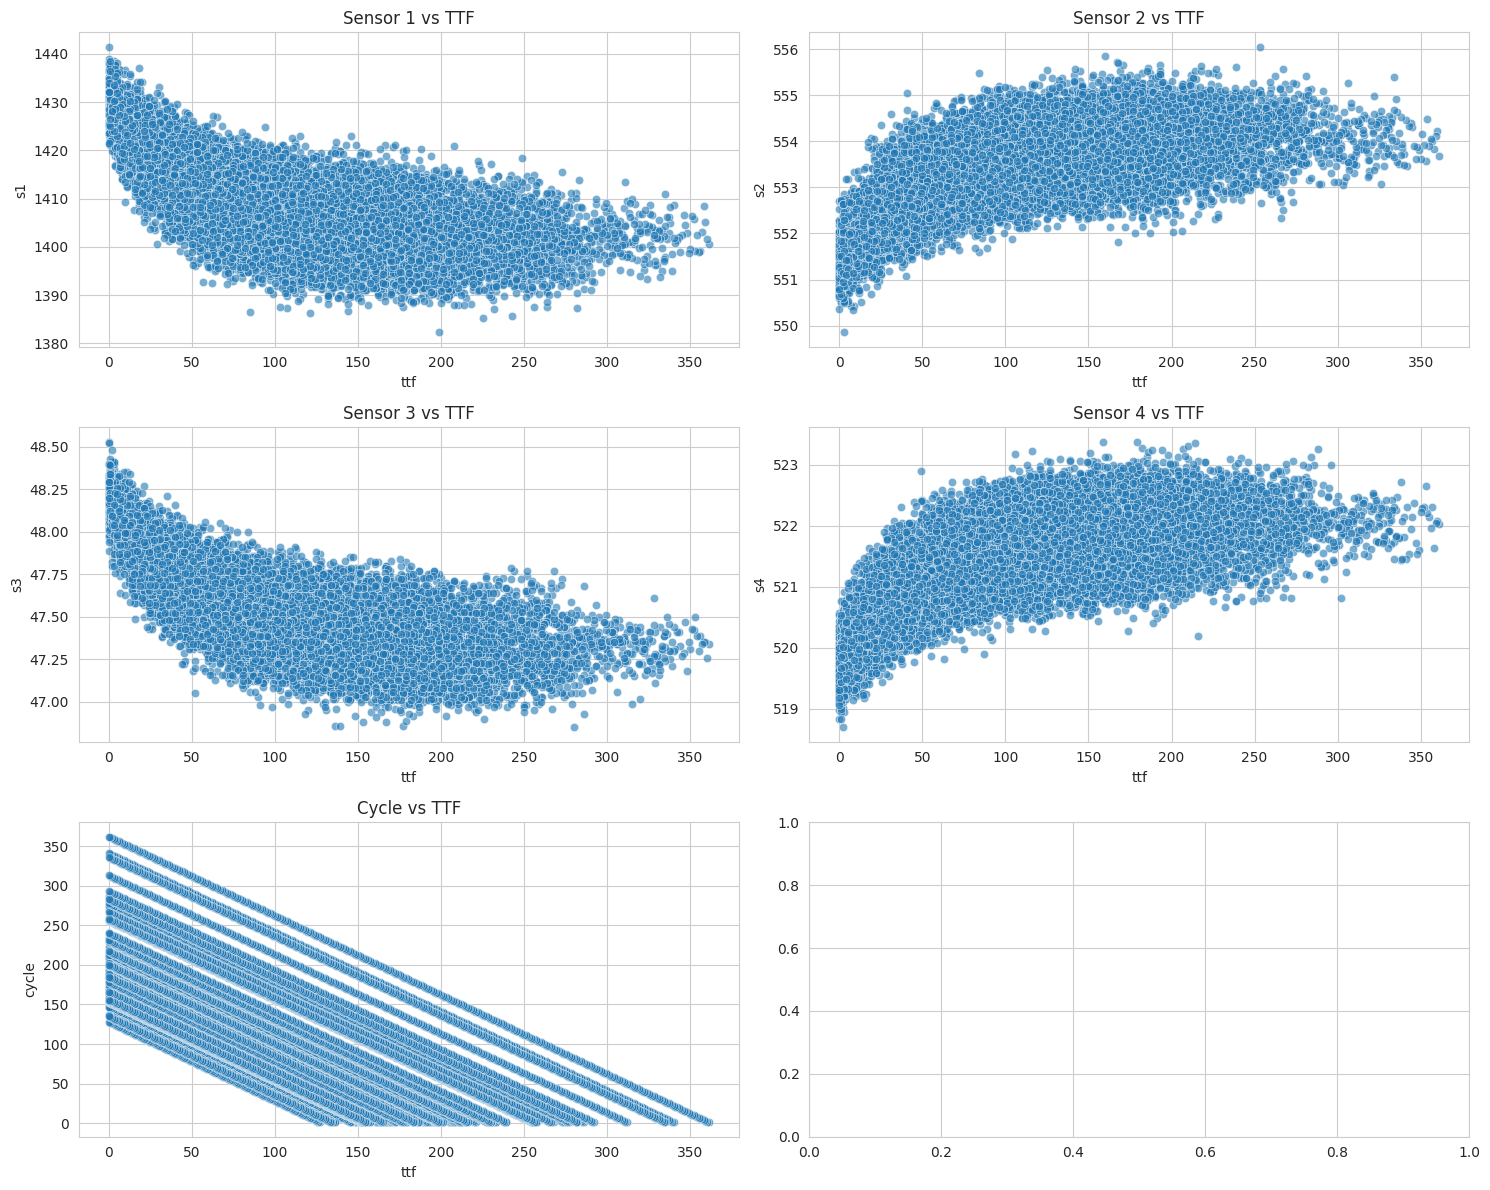

In [31]:
create_corelation_scatter_plot(train_df)

In [32]:
all_columns = list(train_df.columns)
col_to_drop = [col for col in all_columns if col not in ['s1','s2','s3','s4']]
col_to_drop

['id',
 'cycle',
 'ttf',
 'label_bnc',
 's1_log',
 's2_log',
 's3_log',
 's4_log',
 'cycle_log',
 's1_sqrt',
 's2_sqrt',
 's3_sqrt',
 's4_sqrt',
 'cycle_sqrt',
 's1_boxcox',
 's2_boxcox',
 's3_boxcox']

In [33]:
def apply_feature_selection(data:pd.DataFrame,f_columns:list):
    mod_data = data.copy()
    all_columns = list(mod_data.columns)
    col_to_drop = [col for col in all_columns if col not in f_columns]
    modified_data = mod_data.drop(col_to_drop,axis=1)
    return modified_data

In [40]:
# Usage
feature_columns = ['s1','s2','s3','s4']
x_feature = apply_feature_selection(train_df,feature_columns)
x_feature.head()

s1      s2     s3      s4
0  1400.60  554.36  47.47  521.66
1  1403.14  553.75  47.49  522.28
2  1404.20  554.26  47.27  522.42
3  1401.87  554.45  47.13  522.86
4  1406.22  554.00  47.28  522.19

## Plots for outliers

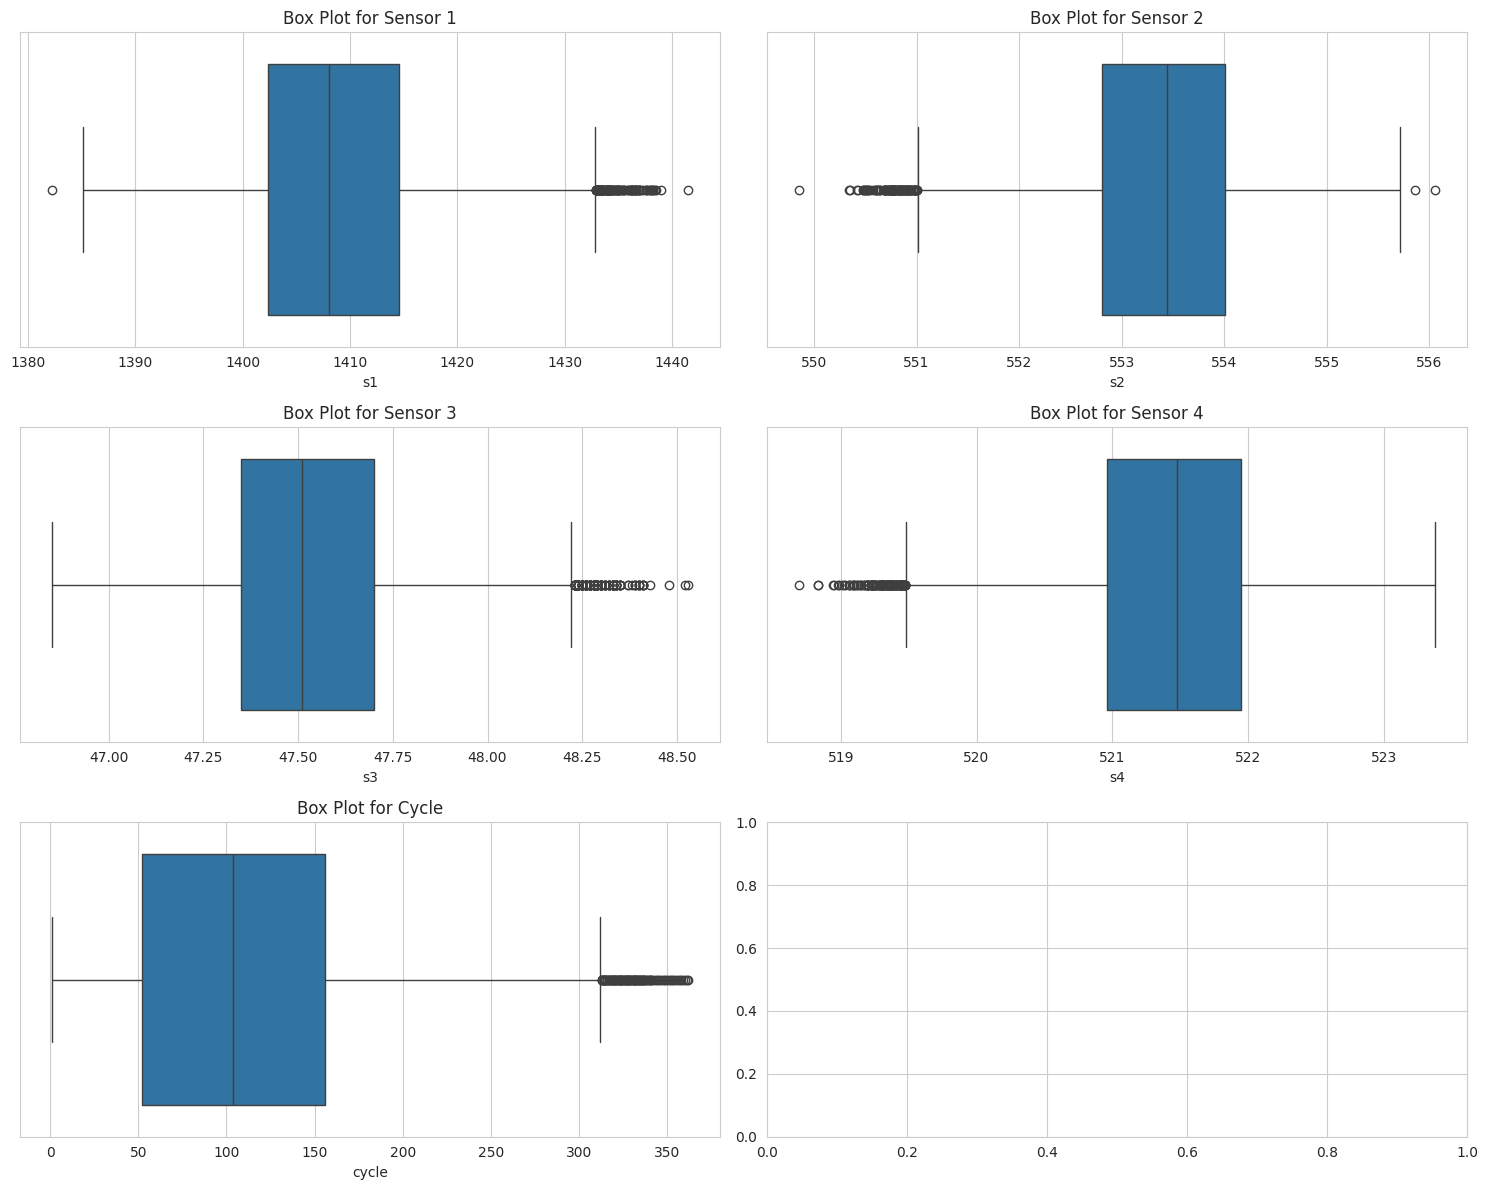

In [42]:
create_box_plots_for_outliers(train_df)

    Number of Outliers
s1                  36
s2                  34
s3                  23
s4                  34


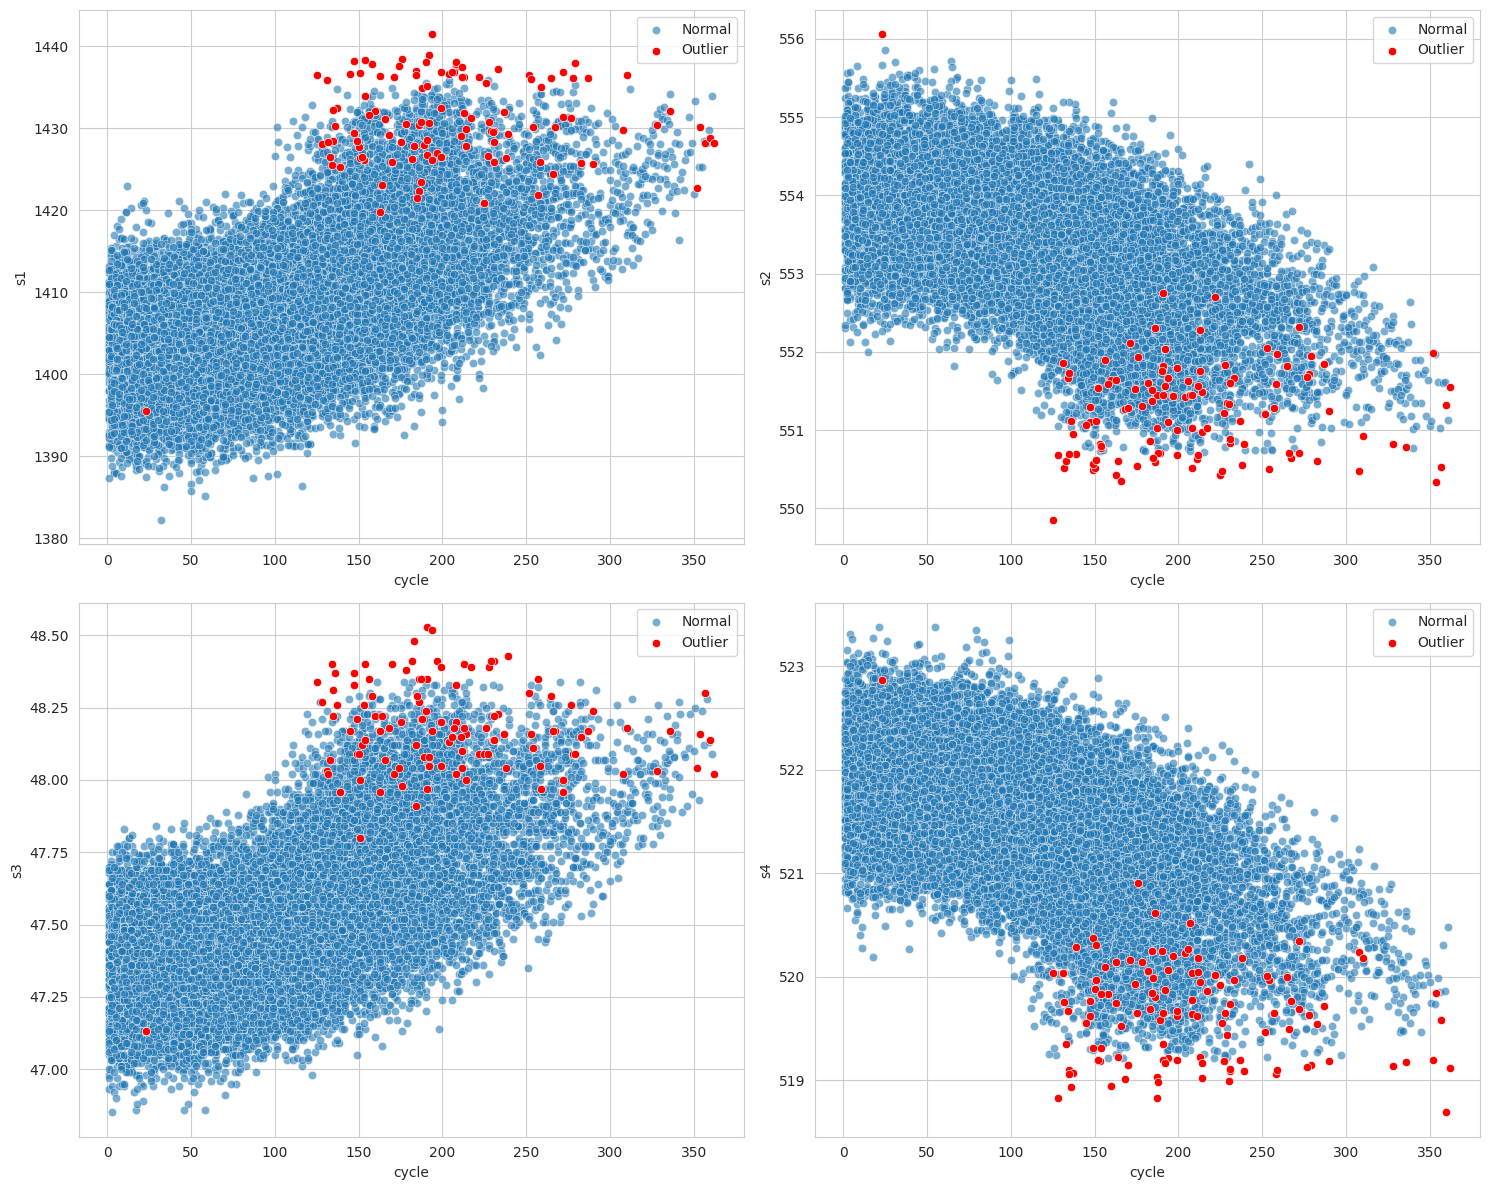

In [43]:
create_scatter_plot_for_outliers(train_df)

## Regression Modelling

In [48]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [68]:
def normalize_features(x_data):
    return x_data/255.

def regression_modelling_without_hyperparameter_tuning_without_cv(x_train, y_train, x_test, y_test, seed):
    
    x_train = normalize_features(x_train)
    x_test = normalize_features(x_test)
    
    results = {
        "model": [],
        "eval_mse": [],
        "eval_rmse": [],
        "r2_score": []
    }
    
    models = []
    predictions = []
    
    # Define models to use
    model_rf = RandomForestRegressor(n_estimators=100, random_state=seed)
    model_gb = GradientBoostingRegressor(random_state=seed)
    model_svr = SVR()

    # Add models to a list for iteration
    for model in [model_rf, model_gb, model_svr]:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        models.append(model.__class__.__name__)
        predictions.append(y_pred)

        # Calculate metrics
        eval_mse = mean_squared_error(y_test, y_pred)
        eval_rmse = sqrt(eval_mse)
        r2 = r2_score(y_test, y_pred)

        # Update results
        results["model"].append(model.__class__.__name__)
        results["eval_mse"].append(eval_mse)
        results["eval_rmse"].append(eval_rmse)
        results["r2_score"].append(r2)
    
    # Plotting
    fig, axs = plt.subplots(len(models), 2, figsize=(15, 6 * len(models)))
    
    for i, (model, y_pred) in enumerate(zip(models, predictions)):
        # Pearson Plot
        sns.regplot(x=y_test, y=y_pred, ax=axs[i, 0])
        axs[i, 0].set_xlabel('True Values')
        axs[i, 0].set_ylabel('Predictions')
        axs[i, 0].set_title(f'{model} - Pearson Correlation Plot')

        # Bland-Altman Plot
        mean = np.mean([y_test, y_pred], axis=0)
        diff = y_test - y_pred
        md = np.mean(diff)
        sd = np.std(diff)
        axs[i, 1].scatter(mean, diff)
        axs[i, 1].axhline(md, color='gray', linestyle='--')
        axs[i, 1].axhline(md + 1.96 * sd, color='gray', linestyle='--')
        axs[i, 1].axhline(md - 1.96 * sd, color='gray', linestyle='--')
        axs[i, 1].set_xlabel('Mean of Two Measurements')
        axs[i, 1].set_ylabel('Difference Between Two Measurements')
        axs[i, 1].set_title(f'{model} - Bland-Altman Plot')

    plt.tight_layout()
    plt.show()

    # Display results
    results_df = pd.DataFrame(results)
    print(tabulate(results_df, headers='keys', tablefmt='pretty'))

def regression_modelling_without_hyperparameter_tuning(x_train, y_train, x_test, y_test, seed):
    
    x_train = normalize_features(x_train)
    x_test = normalize_features(x_test)
    
    results = {
        "model": [],
        "cv_mse": [],
        "eval_mse": [],
        "eval_rmse": [],
        "r2_score": []
    }
    
    models = []
    predictions = []
    
    # Define models to use
    model_rf = RandomForestRegressor(n_estimators=100, random_state=seed)
    model_gb = GradientBoostingRegressor(random_state=seed)
    model_svr = SVR()

    # Add models to a list for iteration
    for model in [model_rf, model_gb, model_svr]:
        # Cross-validation and fitting
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        models.append(model.__class__.__name__)
        predictions.append(y_pred)

        # Calculate metrics
        eval_mse = mean_squared_error(y_test, y_pred)
        eval_rmse = sqrt(eval_mse)
        r2 = r2_score(y_test, y_pred)

        # Update results
        results["model"].append(model.__class__.__name__)
        results["cv_mse"].append(-cv_scores.mean())
        results["eval_mse"].append(eval_mse)
        results["eval_rmse"].append(eval_rmse)
        results["r2_score"].append(r2)
    
    # Plotting
    fig, axs = plt.subplots(len(models), 2, figsize=(15, 6 * len(models)))
    
    for i, (model, y_pred) in enumerate(zip(models, predictions)):
        # Pearson Plot
        sns.regplot(x=y_test, y=y_pred, ax=axs[i, 0])
        axs[i, 0].set_xlabel('True Values')
        axs[i, 0].set_ylabel('Predictions')
        axs[i, 0].set_title(f'{model} - Pearson Correlation Plot')

        # Bland-Altman Plot
        mean = np.mean([y_test, y_pred], axis=0)
        diff = y_test - y_pred
        md = np.mean(diff)
        sd = np.std(diff)
        axs[i, 1].scatter(mean, diff)
        axs[i, 1].axhline(md, color='gray', linestyle='--')
        axs[i, 1].axhline(md + 1.96 * sd, color='gray', linestyle='--')
        axs[i, 1].axhline(md - 1.96 * sd, color='gray', linestyle='--')
        axs[i, 1].set_xlabel('Mean of Two Measurements')
        axs[i, 1].set_ylabel('Difference Between Two Measurements')
        axs[i, 1].set_title(f'{model} - Bland-Altman Plot')

    plt.tight_layout()
    plt.show()

    # Display results
    results_df = pd.DataFrame(results)
    print(tabulate(results_df, headers='keys', tablefmt='pretty'))


def regression_modelling_with_grid_search(x_train, y_train, x_test, y_test, seed):
    
    x_train = normalize_features(x_train)
    x_test = normalize_features(x_test)
    
    results = {
        "model": [],
        "cv_mse": [],
        "eval_mse": [],
        "eval_rmse": [],
        "r2_score": []
    }
    
    models = []
    predictions = []
    
    # Define models to use
    model_rf = RandomForestRegressor(n_estimators=100, random_state=seed)
    model_gb = GradientBoostingRegressor(random_state=seed)
    model_svr = SVR()

    # Define GridSearchCV parameters
    rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    svr_param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
    gb_param_grid = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}

    # Add models and their GridSearchCV configurations to a list for iteration
    model_configurations = [
        (model_rf, rf_param_grid),
        (model_gb, gb_param_grid),
        (model_svr, svr_param_grid)
    ]

    for model, param_grid in model_configurations:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(x_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(x_test)
        models.append(f'GridSearchCV_{best_model.__class__.__name__}')
        predictions.append(y_pred)

        # Calculate metrics
        eval_mse = mean_squared_error(y_test, y_pred)
        eval_rmse = sqrt(eval_mse)
        r2 = r2_score(y_test, y_pred)

        # Update results
        results["model"].append(f'GridSearchCV_{best_model.__class__.__name__}')
        results["cv_mse"].append(-grid_search.best_score_)
        results["eval_mse"].append(eval_mse)
        results["eval_rmse"].append(eval_rmse)
        results["r2_score"].append(r2)
    
    # Plotting
    fig, axs = plt.subplots(len(models), 2, figsize=(15, 6 * len(models)))
    
    for i, (model, y_pred) in enumerate(zip(models, predictions)):
        # Pearson Plot
        sns.regplot(x=y_test, y=y_pred, ax=axs[i, 0])
        axs[i, 0].set_xlabel('True Values')
        axs[i, 0].set_ylabel('Predictions')
        axs[i, 0].set_title(f'{model} - Pearson Correlation Plot')

        # Bland-Altman Plot
        mean = np.mean([y_test, y_pred], axis=0)
        diff = y_test - y_pred
        md = np.mean(diff)
        sd = np.std(diff)
        axs[i, 1].scatter(mean, diff)
        axs[i, 1].axhline(md, color='gray', linestyle='--')
        axs[i, 1].axhline(md + 1.96 * sd, color='gray', linestyle='--')
        axs[i, 1].axhline(md - 1.96 * sd, color='gray', linestyle='--')
        axs[i, 1].set_xlabel('Mean of Two Measurements')
        axs[i, 1].set_ylabel('Difference Between Two Measurements')
        axs[i, 1].set_title(f'{model} - Bland-Altman Plot')

    plt.tight_layout()
    plt.show()

    # Display results
    results_df = pd.DataFrame(results)
    print(tabulate(results_df, headers='keys', tablefmt='pretty'))
    

## Experiment using All 4 Sensors

In [69]:
seed = 42
feature_columns = ['s1','s2','s3','s4']

x_train_feature = apply_feature_selection(train_df,feature_columns)
y_train_target = train_df['ttf']
print(f'Train X Shape: {x_train_feature.shape} | Y Shape: {y_train_target.shape}')

x_eval_feature = apply_feature_selection(eval_df,feature_columns)
y_eval_target = eval_df['ttf']
print(f'Eval X Shape: {x_eval_feature.shape} | Y Shape: {y_eval_target.shape}')


Train X Shape: (20631, 4) | Y Shape: (20631,)
Eval X Shape: (100, 4) | Y Shape: (100,)


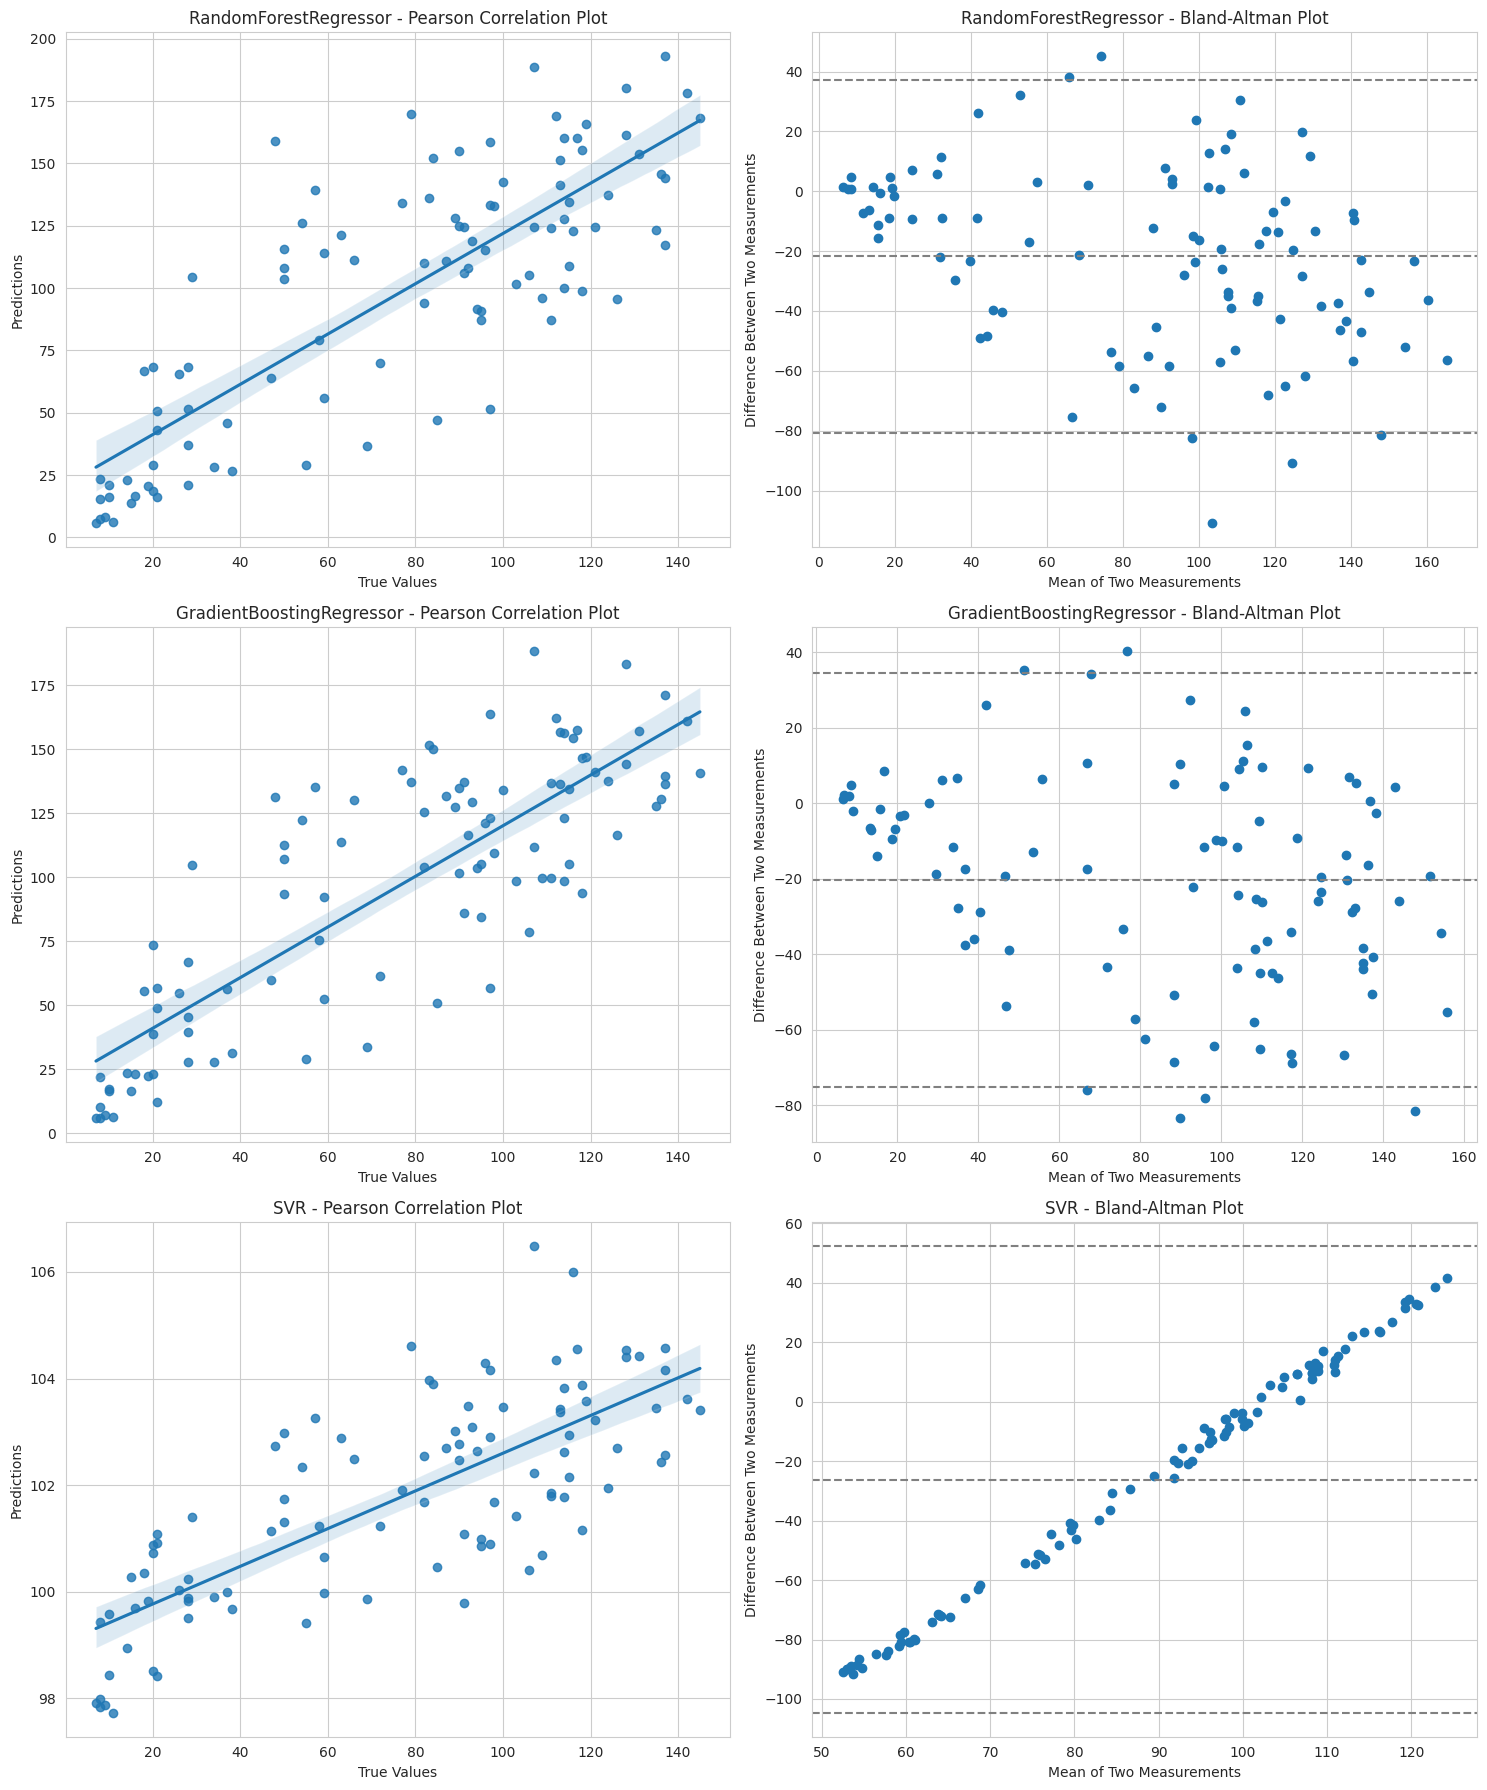

+---+---------------------------+--------------------+--------------------+----------------------+
|   |           model           |      eval_mse      |     eval_rmse      |       r2_score       |
+---+---------------------------+--------------------+--------------------+----------------------+
| 0 |   RandomForestRegressor   | 1378.3162989999996 | 37.12568247184151  |  0.2018411239621104  |
| 1 | GradientBoostingRegressor | 1201.0414149536746 | 34.656044421625424 | 0.30449791058127673  |
| 2 |            SVR            | 2295.6648162860815 | 47.91309650070721  | -0.32937936731649087 |
+---+---------------------------+--------------------+--------------------+----------------------+


In [70]:
regression_modelling_without_hyperparameter_tuning_without_cv(x_train_feature,y_train_target,x_eval_feature,y_eval_target,seed)

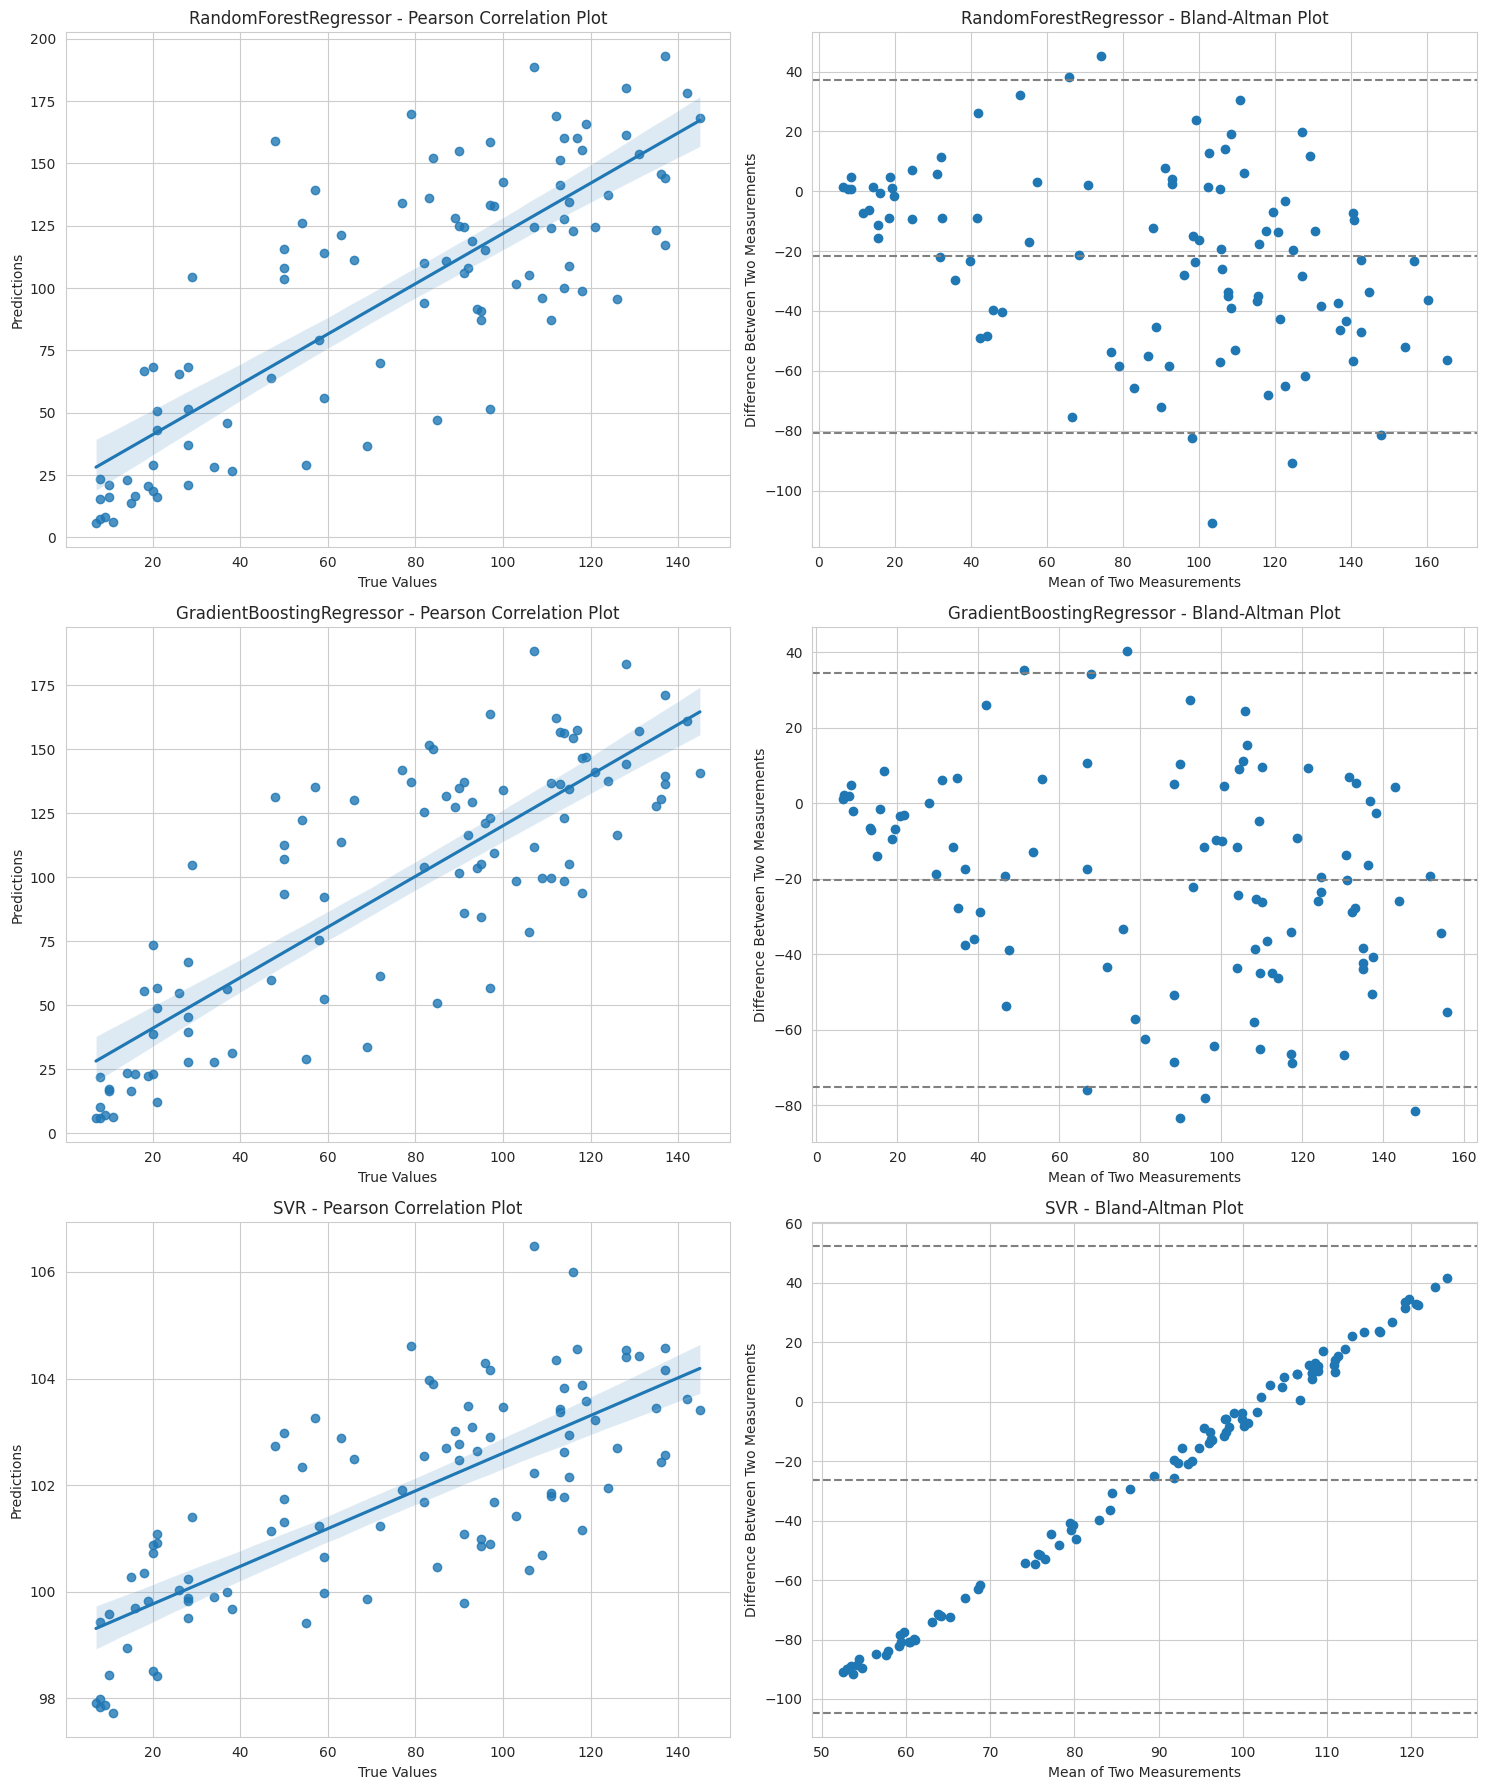

+---+---------------------------+--------------------+--------------------+--------------------+----------------------+
|   |           model           |       cv_mse       |      eval_mse      |     eval_rmse      |       r2_score       |
+---+---------------------------+--------------------+--------------------+--------------------+----------------------+
| 0 |   RandomForestRegressor   | 2486.5779029497944 | 1378.3162989999996 | 37.12568247184151  |  0.2018411239621104  |
| 1 | GradientBoostingRegressor | 2285.1704743235396 | 1201.0414149536746 | 34.656044421625424 | 0.30449791058127673  |
| 2 |            SVR            | 4655.805715700478  | 2295.6648162860815 | 47.91309650070721  | -0.32937936731649087 |
+---+---------------------------+--------------------+--------------------+--------------------+----------------------+


In [71]:
regression_modelling_without_hyperparameter_tuning(x_train_feature,y_train_target,x_eval_feature,y_eval_target,seed)


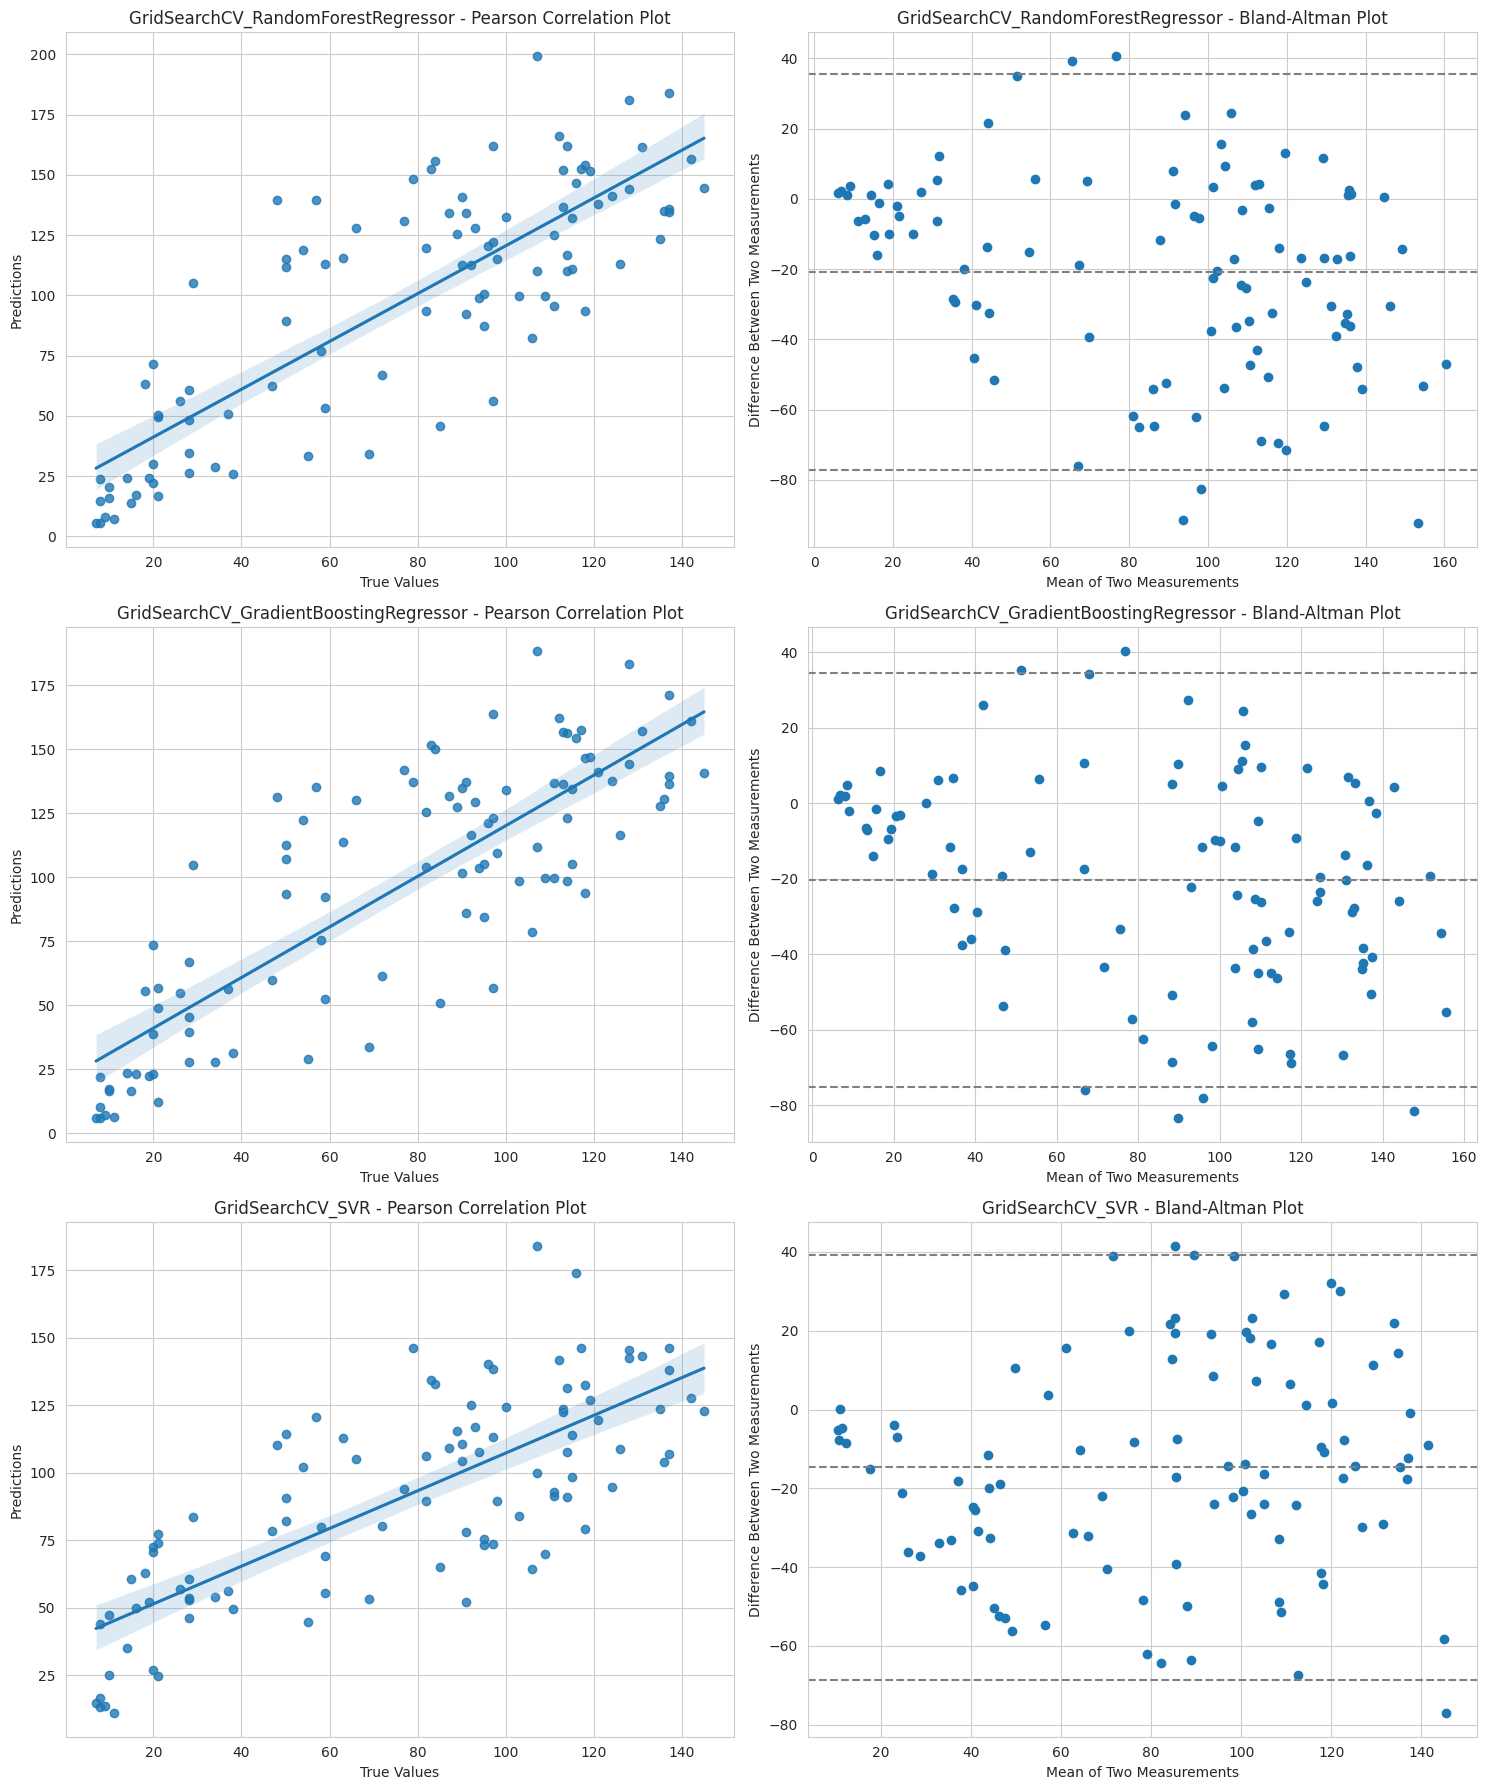

+---+----------------------------------------+--------------------+--------------------+--------------------+---------------------+
|   |                 model                  |       cv_mse       |      eval_mse      |     eval_rmse      |      r2_score       |
+---+----------------------------------------+--------------------+--------------------+--------------------+---------------------+
| 0 |   GridSearchCV_RandomForestRegressor   |  2323.72674589732  | 1257.6318721137143 | 35.46310578775799  | 0.27172736603058234 |
| 1 | GridSearchCV_GradientBoostingRegressor | 2285.1704743235396 | 1201.0414149536746 | 34.656044421625424 | 0.30449791058127673 |
| 2 |            GridSearchCV_SVR            | 2756.7983672676846 | 972.9014158671321  | 31.191367649834337 | 0.43660979620746565 |
+---+----------------------------------------+--------------------+--------------------+--------------------+---------------------+


In [72]:
regression_modelling_with_grid_search(x_train_feature,y_train_target,x_eval_feature,y_eval_target,seed)
